                     Airbnb Price Prediction with Deep Learning and Linear Regression
                                        (PROU Summer Internship 2023)
Submitted By: Sapthak Mohajon Turjya                                                                

Date: 07-06-2023

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Data Importing

In [2]:
df =pd.read_csv('train.csv')

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.head(5)

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [6]:
df.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


Data Visualization, Exploration, Preprocessing, and filling Missing Values

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


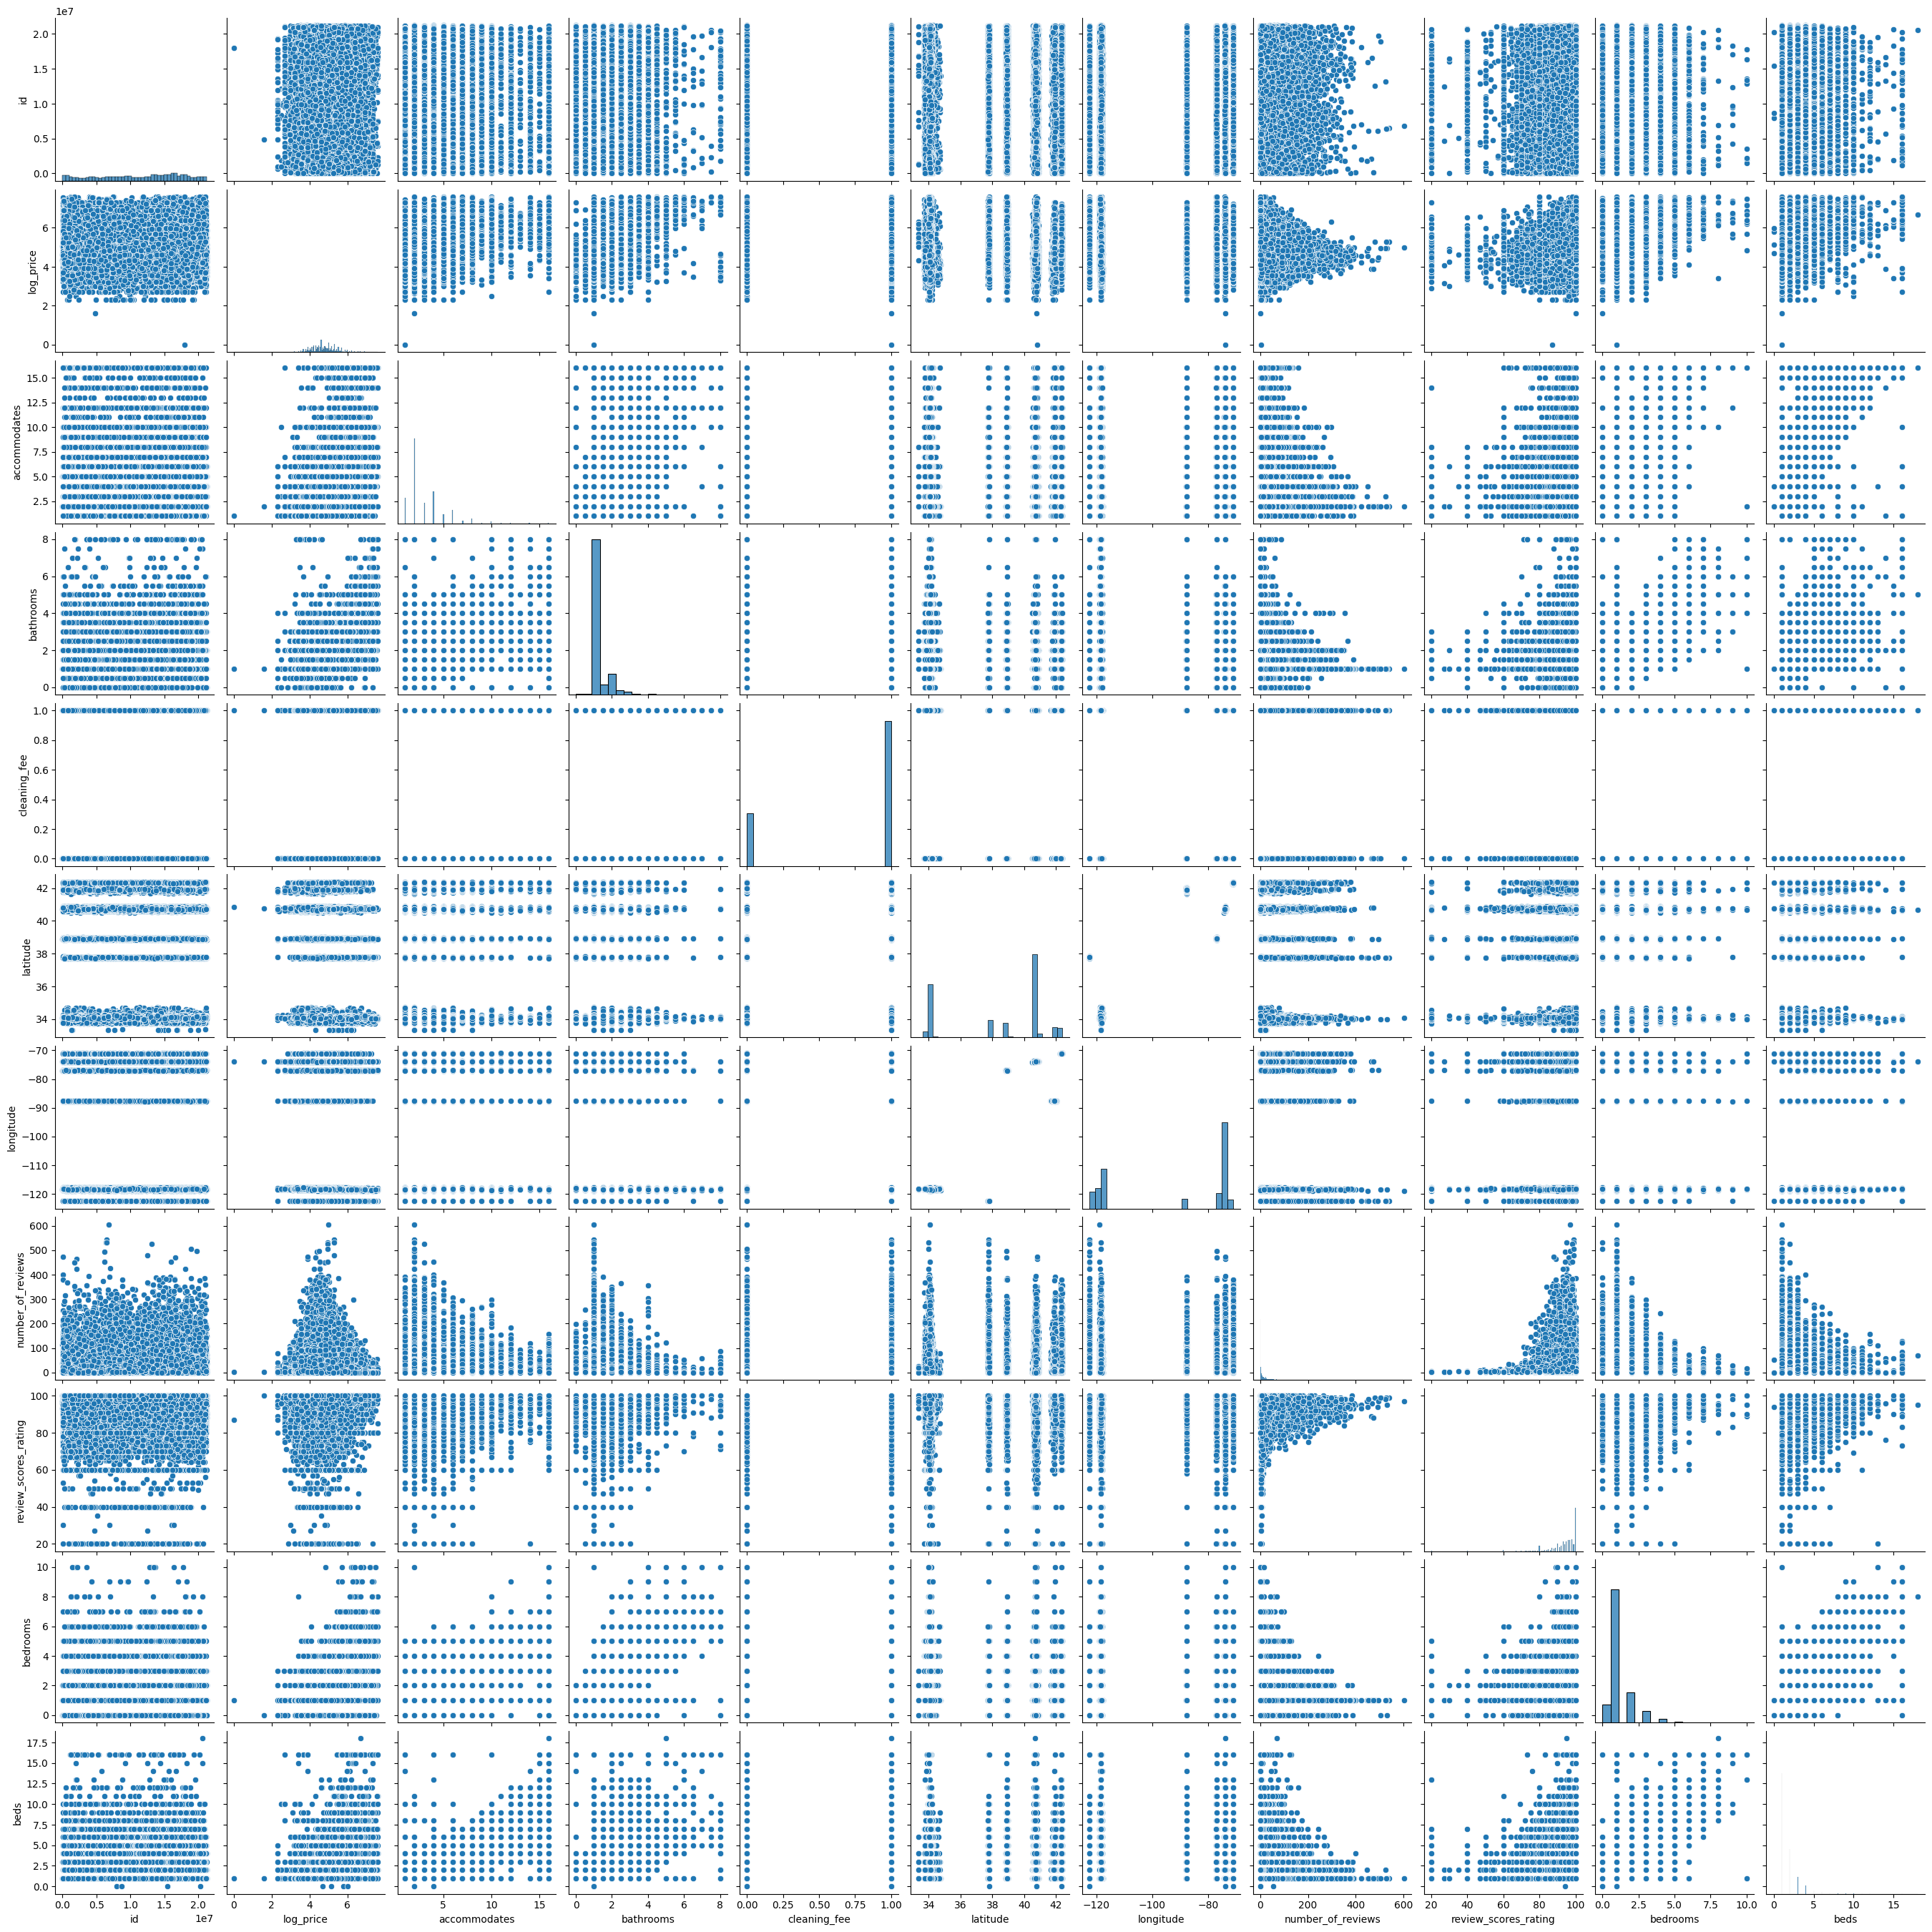

In [126]:
sns.pairplot(df)

In [7]:
df['room_type'].value_counts()

room_type
Entire home/apt    41310
Private room       30638
Shared room         2163
Name: count, dtype: int64

In [8]:
df['property_type'].value_counts()

property_type
Apartment             49003
House                 16511
Condominium            2658
Townhouse              1692
Loft                   1244
Other                   607
Guesthouse              498
Bed & Breakfast         462
Bungalow                366
Villa                   179
Dorm                    142
Guest suite             123
Camper/RV                94
Timeshare                77
Cabin                    72
In-law                   71
Hostel                   70
Boutique hotel           69
Boat                     65
Serviced apartment       21
Tent                     18
Castle                   13
Vacation home            11
Yurt                      9
Hut                       8
Treehouse                 7
Chalet                    6
Earth House               4
Tipi                      3
Train                     2
Cave                      2
Casa particular           1
Parking Space             1
Lighthouse                1
Island                    1
Name: 

In [9]:
df['bed_type'].value_counts()

bed_type
Real Bed         72028
Futon              753
Pull-out Sofa      585
Airbed             477
Couch              268
Name: count, dtype: int64

In [10]:
df['neighbourhood'].value_counts()

neighbourhood
Williamsburg          2862
Bedford-Stuyvesant    2166
Bushwick              1601
Upper West Side       1396
Mid-Wilshire          1392
                      ... 
Mill Basin               1
Mt. Vernon Square        1
Chevy Chase, MD          1
Clearing                 1
Grant City               1
Name: count, Length: 619, dtype: int64

In [11]:
df['name'].value_counts()

name
Bunk bed in the Treat Street Clubhouse           8
Your home away from home                         7
East Village Studio                              7
Cozy Private Room                                6
Location, Location, Location                     6
                                                ..
Charming studio apartment in Adams Morgan.       1
Studio City cozy studio w/ parking               1
SPACIOUS UPPER HAIGHT HOME IN THE HEART OF SF    1
Downtown LA Luxury Apartment 2                   1
Cozy Boat at Shoreline Village                   1
Name: count, Length: 73359, dtype: int64

In [12]:
df['amenities'].value_counts()

amenities
{}                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               586
{"translation missing: en.hosting_amenity_49","translation missing: en.hosting_amenity_50"}                                                                                                                                                                                                                                                                                                                              

In [13]:
df['cancellation_policy'].value_counts()

cancellation_policy
strict             32374
flexible           22545
moderate           19063
super_strict_30      112
super_strict_60       17
Name: count, dtype: int64

In [14]:
df['thumbnail_url'].value_counts()

thumbnail_url
https://a0.muscache.com/im/pictures/70087089/bc66229a_original.jpg?aki_policy=small              3
https://a0.muscache.com/im/pictures/23033013/54d62516_original.jpg?aki_policy=small              2
https://a0.muscache.com/im/pictures/104667326/a7a2b145_original.jpg?aki_policy=small             2
https://a0.muscache.com/im/pictures/95059281/d8bfc436_original.jpg?aki_policy=small              2
https://a0.muscache.com/im/pictures/4491e5c5-33f6-4704-9887-76a059f86fda.jpg?aki_policy=small    2
                                                                                                ..
https://a0.muscache.com/im/pictures/111150220/7099e1de_original.jpg?aki_policy=small             1
https://a0.muscache.com/im/pictures/bfc6695c-93f9-4a90-a6d8-9f6c038fff28.jpg?aki_policy=small    1
https://a0.muscache.com/im/pictures/99319739/70c4beaf_original.jpg?aki_policy=small              1
https://a0.muscache.com/im/pictures/3897544/bed318ce_original.jpg?aki_policy=small             

In [15]:
df.corr(numeric_only=True)

,id,log_price,accommodates,bathrooms,cleaning_fee,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
id,1.000000,-0.007178,-0.005759,-0.003951,-0.003059,-0.003021,-0.001379,0.002945,0.000307,-0.007521,-0.008665
log_price,-0.007178,1.000000,0.567574,0.355420,0.111191,-0.002193,-0.047529,-0.032470,0.091219,0.473212,0.442153
accommodates,-0.005759,0.567574,1.000000,0.505632,0.182306,-0.078309,-0.085160,0.041964,-0.017128,0.709258,0.810801
bathrooms,-0.003951,0.355420,0.505632,1.000000,0.053784,-0.137959,-0.135026,-0.041381,0.010537,0.589935,0.525591
cleaning_fee,-0.003059,0.111191,0.182306,0.053784,1.000000,-0.060913,-0.068505,0.110204,0.034879,0.105454,0.131632
latitude,-0.003021,-0.002193,-0.078309,-0.137959,-0.060913,1.000000,0.896065,-0.017642,-0.032858,-0.059162,-0.080294
longitude,-0.001379,-0.047529,-0.085160,-0.135026,-0.068505,0.896065,1.000000,-0.050009,-0.048801,-0.076113,-0.082150
number_of_reviews,0.002945,-0.032470,0.041964,-0.041381,0.110204,-0.017642,-0.050009,1.000000,0.011708,-0.035149,0.031109
review_scores_rating,0.000307,0.091219,-0.017128,0.010537,0.034879,-0.032858,-0.048801,0.011708,1.000000,0.011143,-0.027330
bedrooms,-0.007521,0.473212,0.709258,0.589935,0.105454,-0.059162,-0.076113,-0.035149,0.011143,1.000000,0.709416


In [16]:
df.isnull().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64

In [17]:
# As per the correlation data the id feature it not very correlated with the other features, so it can be dropped
df=df.drop('id', axis=1)

In [18]:
df.head(3)

,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0


In [19]:
# The thumbnail value count has a distribution of 3,2,1 so its change it negligible, and the thumbnail_url also seems to be not impacting the price
# so we can drop it
df=df.drop('thumbnail_url', axis=1)

In [20]:
df.head(3)

,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds
0,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,...,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,11201,1.0,1.0
1,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,...,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,10019,3.0,3.0
2,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,...,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,10027,1.0,3.0


In [21]:
# The name attribute is not also impactful on the log_price, thus it can be dropped
df=df.drop('name', axis=1)

<Axes: xlabel='zipcode', ylabel='log_price'>

) missing from current font.g\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 13 (
  func(*args, **kwargs)
) missing from current font.g\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


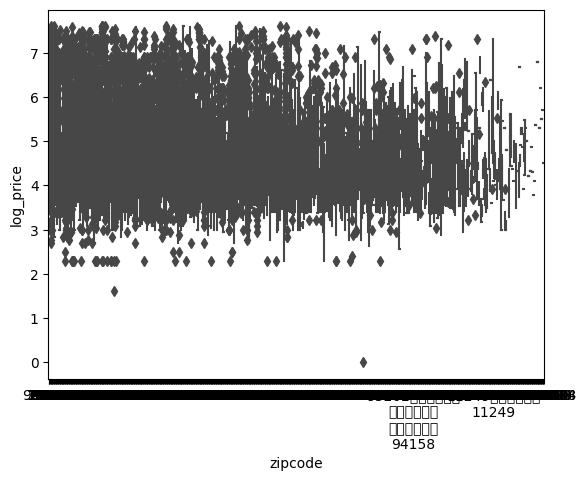

In [22]:
sns.boxplot(x='zipcode',y='log_price',data=df,palette='rainbow')

In [23]:
# As per the plot the distribution is uniform across the log_price, thus it is not impacting the log_price that much so we can drop it
df=df.drop('zipcode', axis=1)

In [24]:
df.head(3)

,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,host_since,instant_bookable,last_review,latitude,longitude,neighbourhood,number_of_reviews,review_scores_rating,bedrooms,beds
0,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,...,2012-03-26,f,2016-07-18,40.696524,-73.991617,Brooklyn Heights,2,100.0,1.0,1.0
1,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,...,2017-06-19,t,2017-09-23,40.766115,-73.989040,Hell's Kitchen,6,93.0,3.0,3.0
2,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,...,2016-10-25,t,2017-09-14,40.808110,-73.943756,Harlem,10,92.0,1.0,3.0


In [25]:
df['property_type'].value_counts()

property_type
Apartment             49003
House                 16511
Condominium            2658
Townhouse              1692
Loft                   1244
Other                   607
Guesthouse              498
Bed & Breakfast         462
Bungalow                366
Villa                   179
Dorm                    142
Guest suite             123
Camper/RV                94
Timeshare                77
Cabin                    72
In-law                   71
Hostel                   70
Boutique hotel           69
Boat                     65
Serviced apartment       21
Tent                     18
Castle                   13
Vacation home            11
Yurt                      9
Hut                       8
Treehouse                 7
Chalet                    6
Earth House               4
Tipi                      3
Train                     2
Cave                      2
Casa particular           1
Parking Space             1
Lighthouse                1
Island                    1
Name: 

<Axes: xlabel='property_type', ylabel='log_price'>

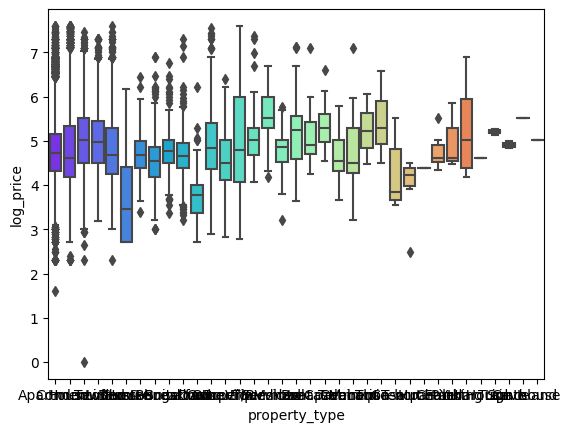

In [26]:
sns.boxplot(x='property_type',y='log_price',data=df,palette='rainbow')

In [27]:
# property type also seems to be not impacting the price that much thus we can drop it
df=df.drop('property_type', axis=1)

In [28]:
df

,log_price,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,...,host_since,instant_bookable,last_review,latitude,longitude,neighbourhood,number_of_reviews,review_scores_rating,bedrooms,beds
0,5.010635,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",...,2012-03-26,f,2016-07-18,40.696524,-73.991617,Brooklyn Heights,2,100.0,1.0,1.0
1,5.129899,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,...,2017-06-19,t,2017-09-23,40.766115,-73.989040,Hell's Kitchen,6,93.0,3.0,3.0
2,4.976734,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,The Oasis comes complete with a full backyard ...,...,2016-10-25,t,2017-09-14,40.808110,-73.943756,Harlem,10,92.0,1.0,3.0
3,6.620073,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,This light-filled home-away-from-home is super...,...,2015-04-19,f,NaN,37.772004,-122.431619,Lower Haight,0,NaN,2.0,2.0
4,4.744932,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,"Cool, cozy, and comfortable studio located in ...",...,2015-03-01,t,2017-01-22,38.925627,-77.034596,Columbia Heights,4,40.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,4.605170,Private room,{},1,1.0,Real Bed,flexible,False,NYC,one room in bushwick apt,...,2013-03-24,f,NaN,40.709025,-73.939405,Williamsburg,0,NaN,1.0,1.0
74107,5.043425,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,2.0,Real Bed,moderate,True,LA,"Located on the Pacific Coast Highway, this apa...",...,2016-05-03,f,2017-04-15,33.871549,-118.396053,Hermosa Beach,16,93.0,2.0,4.0
74108,5.220356,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",5,1.0,Real Bed,moderate,True,NYC,A modern apartment located in East Williamsbur...,...,2012-01-05,t,2017-09-10,40.706749,-73.942377,Williamsburg,43,94.0,2.0,2.0
74109,5.273000,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Real Bed,strict,True,NYC,"Fully renovated, designer's studio located in ...",...,2017-09-17,t,NaN,40.738535,-74.000157,West Village,0,NaN,0.0,2.0


<Axes: xlabel='room_type', ylabel='log_price'>

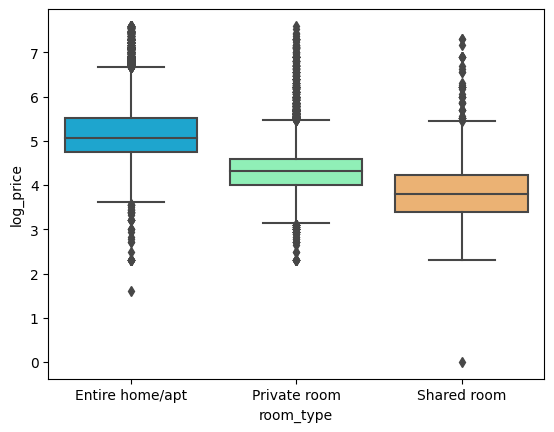

In [29]:
sns.boxplot(x='room_type',y='log_price',data=df,palette='rainbow')

In [30]:
# We are giving labels to the room_types to perform regression tasks
df['room_type']=df['room_type'].map({'Entire home/apt':2, 'Private room': 1, 'Shared room': 0})

In [31]:
df.head(3)

,log_price,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,...,host_since,instant_bookable,last_review,latitude,longitude,neighbourhood,number_of_reviews,review_scores_rating,bedrooms,beds
0,5.010635,2,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",...,2012-03-26,f,2016-07-18,40.696524,-73.991617,Brooklyn Heights,2,100.0,1.0,1.0
1,5.129899,2,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,...,2017-06-19,t,2017-09-23,40.766115,-73.989040,Hell's Kitchen,6,93.0,3.0,3.0
2,4.976734,2,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,The Oasis comes complete with a full backyard ...,...,2016-10-25,t,2017-09-14,40.808110,-73.943756,Harlem,10,92.0,1.0,3.0


In [32]:
df['bed_type'].value_counts()

bed_type
Real Bed         72028
Futon              753
Pull-out Sofa      585
Airbed             477
Couch              268
Name: count, dtype: int64

<Axes: xlabel='bed_type', ylabel='log_price'>

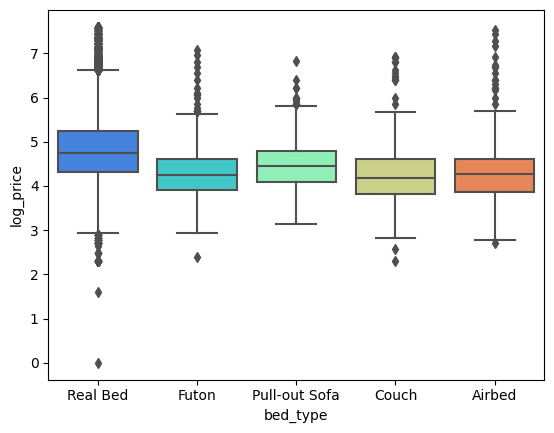

In [33]:
sns.boxplot(x='bed_type',y='log_price',data=df,palette='rainbow')

In [34]:
# As seen above the log_price for the bed type: Fulton, Pull-out Sofa, Couch, and Airbed are quite similar
# Thus we can group them into one group
df['bed_type']=df['bed_type'].map({'Real Bed':1, 'Fulton': 0, 'Pull-out Sofa': 0, 'Couch': 0, 'Airbed' : 0})

In [35]:
df.head(3)

,log_price,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,...,host_since,instant_bookable,last_review,latitude,longitude,neighbourhood,number_of_reviews,review_scores_rating,bedrooms,beds
0,5.010635,2,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,1.0,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",...,2012-03-26,f,2016-07-18,40.696524,-73.991617,Brooklyn Heights,2,100.0,1.0,1.0
1,5.129899,2,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,1.0,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,...,2017-06-19,t,2017-09-23,40.766115,-73.989040,Hell's Kitchen,6,93.0,3.0,3.0
2,4.976734,2,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,1.0,moderate,True,NYC,The Oasis comes complete with a full backyard ...,...,2016-10-25,t,2017-09-14,40.808110,-73.943756,Harlem,10,92.0,1.0,3.0


In [36]:
df['cancellation_policy'].value_counts()

cancellation_policy
strict             32374
flexible           22545
moderate           19063
super_strict_30      112
super_strict_60       17
Name: count, dtype: int64

<Axes: xlabel='cancellation_policy', ylabel='log_price'>

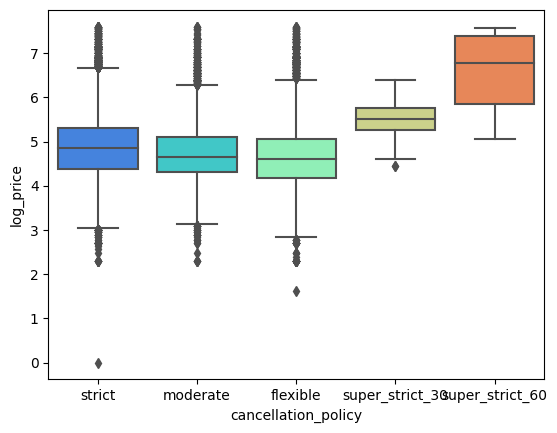

In [37]:
sns.boxplot(x='cancellation_policy',y='log_price',data=df,palette='rainbow')

In [38]:
df['cancellation_policy']=df['cancellation_policy'].map({'strict':0, 'moderate': 0, 'flexible': 0, 'super_strict_30': 1, 'super_strict_60' : 2})

In [39]:
df['city'].value_counts()

city
NYC        32349
LA         22453
SF          6434
DC          5688
Chicago     3719
Boston      3468
Name: count, dtype: int64

<Axes: xlabel='city', ylabel='log_price'>

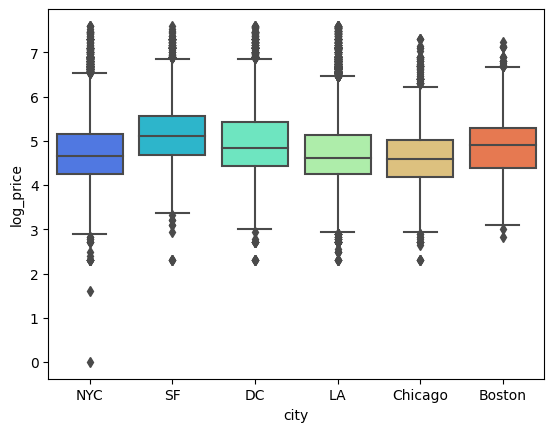

In [40]:
sns.boxplot(x='city',y='log_price',data=df,palette='rainbow')

In [41]:
# The impact of city type in the log price is very minimal as their box_plot representation is very similar, thus we can discard this column
df=df.drop('city', axis=1)

In [42]:
df.head(3)

,log_price,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,description,first_review,...,host_since,instant_bookable,last_review,latitude,longitude,neighbourhood,number_of_reviews,review_scores_rating,bedrooms,beds
0,5.010635,2,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,1.0,0,True,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,...,2012-03-26,f,2016-07-18,40.696524,-73.991617,Brooklyn Heights,2,100.0,1.0,1.0
1,5.129899,2,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,1.0,0,True,Enjoy travelling during your stay in Manhattan...,2017-08-05,...,2017-06-19,t,2017-09-23,40.766115,-73.989040,Hell's Kitchen,6,93.0,3.0,3.0
2,4.976734,2,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,1.0,0,True,The Oasis comes complete with a full backyard ...,2017-04-30,...,2016-10-25,t,2017-09-14,40.808110,-73.943756,Harlem,10,92.0,1.0,3.0


In [43]:
df['neighbourhood'].value_counts()

neighbourhood
Williamsburg          2862
Bedford-Stuyvesant    2166
Bushwick              1601
Upper West Side       1396
Mid-Wilshire          1392
                      ... 
Mill Basin               1
Mt. Vernon Square        1
Chevy Chase, MD          1
Clearing                 1
Grant City               1
Name: count, Length: 619, dtype: int64

<Axes: xlabel='neighbourhood', ylabel='log_price'>

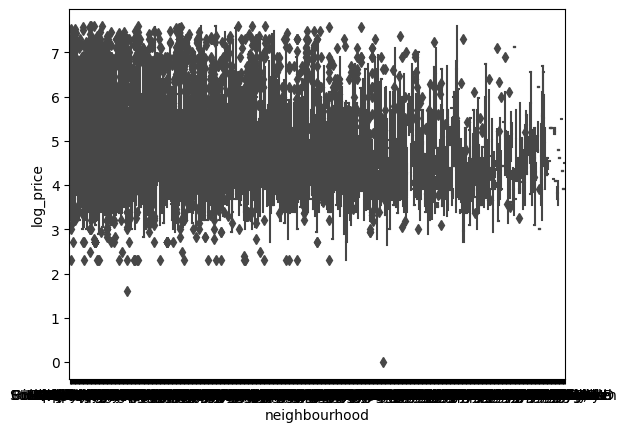

In [44]:
sns.boxplot(x='neighbourhood',y='log_price',data=df,palette='rainbow')

In [45]:
# The neighbourhood types is unifrom across the log_price, thus we can drop it
df=df.drop('neighbourhood', axis=1)

In [46]:
df.head(3)

,log_price,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,description,first_review,...,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
0,5.010635,2,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,1.0,0,True,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,...,NaN,2012-03-26,f,2016-07-18,40.696524,-73.991617,2,100.0,1.0,1.0
1,5.129899,2,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,1.0,0,True,Enjoy travelling during your stay in Manhattan...,2017-08-05,...,100%,2017-06-19,t,2017-09-23,40.766115,-73.989040,6,93.0,3.0,3.0
2,4.976734,2,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,1.0,0,True,The Oasis comes complete with a full backyard ...,2017-04-30,...,100%,2016-10-25,t,2017-09-14,40.808110,-73.943756,10,92.0,1.0,3.0


In [47]:
# As we are not doing text analysis that is why we can drop the description column
df=df.drop('description', axis=1)

In [48]:
df.head(3)

,log_price,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,first_review,host_has_profile_pic,...,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
0,5.010635,2,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,1.0,0,True,2016-06-18,t,...,NaN,2012-03-26,f,2016-07-18,40.696524,-73.991617,2,100.0,1.0,1.0
1,5.129899,2,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,1.0,0,True,2017-08-05,t,...,100%,2017-06-19,t,2017-09-23,40.766115,-73.989040,6,93.0,3.0,3.0
2,4.976734,2,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,1.0,0,True,2017-04-30,t,...,100%,2016-10-25,t,2017-09-14,40.808110,-73.943756,10,92.0,1.0,3.0


In [49]:
df.columns

Index(['log_price', 'room_type', 'amenities', 'accommodates', 'bathrooms',
       'bed_type', 'cancellation_policy', 'cleaning_fee', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'number_of_reviews', 'review_scores_rating', 'bedrooms',
       'beds'],
      dtype='object')

In [50]:
df[['host_has_profile_pic', 'host_identity_verified']]

,host_has_profile_pic,host_identity_verified
0,t,t
1,t,f
2,t,t
3,t,t
4,t,t
...,...,...
74106,t,t
74107,t,f
74108,t,t
74109,t,f


In [51]:
df['host_has_profile_pic'].value_counts()

host_has_profile_pic
t    73697
f      226
Name: count, dtype: int64

In [52]:
df['host_identity_verified'].value_counts()

host_identity_verified
t    49748
f    24175
Name: count, dtype: int64

In [53]:
df['host_has_profile_pic']=df['host_has_profile_pic'].map({'t':1, 'f':0})
df['host_identity_verified']=df['host_identity_verified'].map({'t':1, 'f':0})

In [54]:
df.head(5)

,log_price,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,first_review,host_has_profile_pic,...,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
0,5.010635,2,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,1.0,0,True,2016-06-18,1.0,...,NaN,2012-03-26,f,2016-07-18,40.696524,-73.991617,2,100.0,1.0,1.0
1,5.129899,2,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,1.0,0,True,2017-08-05,1.0,...,100%,2017-06-19,t,2017-09-23,40.766115,-73.989040,6,93.0,3.0,3.0
2,4.976734,2,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,1.0,0,True,2017-04-30,1.0,...,100%,2016-10-25,t,2017-09-14,40.808110,-73.943756,10,92.0,1.0,3.0
3,6.620073,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,1.0,0,True,NaN,1.0,...,NaN,2015-04-19,f,NaN,37.772004,-122.431619,0,NaN,2.0,2.0
4,4.744932,2,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,1.0,0,True,2015-05-12,1.0,...,100%,2015-03-01,t,2017-01-22,38.925627,-77.034596,4,40.0,0.0,1.0


In [55]:
df['instant_bookable']

0        f
1        t
2        t
3        f
4        t
        ..
74106    f
74107    f
74108    t
74109    t
74110    f
Name: instant_bookable, Length: 74111, dtype: object

In [56]:
df['instant_bookable']=df['instant_bookable'].map({'t':1, 'f':0})

In [57]:
df.head(5)

,log_price,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,first_review,host_has_profile_pic,...,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
0,5.010635,2,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,1.0,0,True,2016-06-18,1.0,...,NaN,2012-03-26,0,2016-07-18,40.696524,-73.991617,2,100.0,1.0,1.0
1,5.129899,2,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,1.0,0,True,2017-08-05,1.0,...,100%,2017-06-19,1,2017-09-23,40.766115,-73.989040,6,93.0,3.0,3.0
2,4.976734,2,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,1.0,0,True,2017-04-30,1.0,...,100%,2016-10-25,1,2017-09-14,40.808110,-73.943756,10,92.0,1.0,3.0
3,6.620073,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,1.0,0,True,NaN,1.0,...,NaN,2015-04-19,0,NaN,37.772004,-122.431619,0,NaN,2.0,2.0
4,4.744932,2,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,1.0,0,True,2015-05-12,1.0,...,100%,2015-03-01,1,2017-01-22,38.925627,-77.034596,4,40.0,0.0,1.0


In [58]:
df['cleaning_fee']

0         True
1         True
2         True
3         True
4         True
         ...  
74106    False
74107     True
74108     True
74109     True
74110    False
Name: cleaning_fee, Length: 74111, dtype: bool

In [59]:
type(df['last_review'])

pandas.core.series.Series

In [60]:
df.isnull().sum()

log_price                     0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                    753
cancellation_policy           0
cleaning_fee                  0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
number_of_reviews             0
review_scores_rating      16722
bedrooms                     91
beds                        131
dtype: int64

C:\Users\KIIT\AppData\Local\Temp\ipykernel_10324\4182137666.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bathrooms'],bins=30,kde=False,color='red')


<Axes: xlabel='bathrooms'>

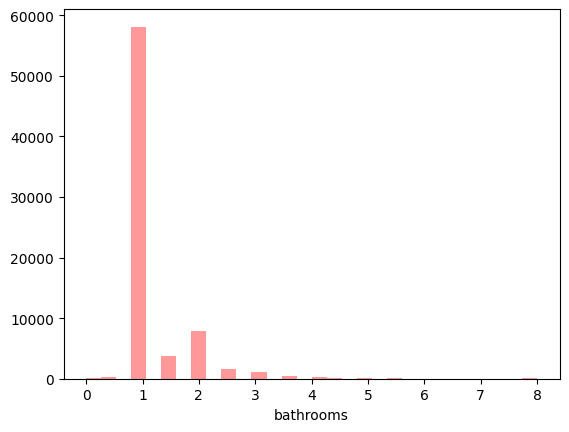

In [61]:
sns.distplot(df['bathrooms'],bins=30,kde=False,color='red')

In [62]:
# We can fill in the bathrooms number with Nan values with 1, as it is occuring in the majority, and its number is also low
df['bathrooms'].fillna(value=1, inplace=True)

In [63]:
df.isnull().sum()

log_price                     0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                     0
bed_type                    753
cancellation_policy           0
cleaning_fee                  0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
number_of_reviews             0
review_scores_rating      16722
bedrooms                     91
beds                        131
dtype: int64

In [64]:
df['bed_type']

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
74106    1.0
74107    1.0
74108    1.0
74109    1.0
74110    1.0
Name: bed_type, Length: 74111, dtype: float64

C:\Users\KIIT\AppData\Local\Temp\ipykernel_10324\684861330.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bed_type'],bins=30,kde=False,color='red')


<Axes: xlabel='bed_type'>

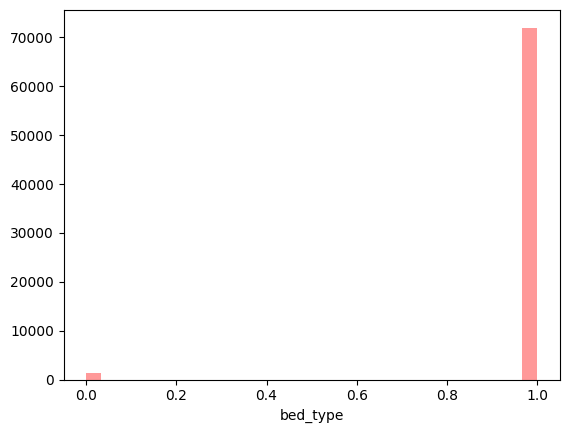

In [65]:
sns.distplot(df['bed_type'],bins=30,kde=False,color='red')

In [66]:
# We can fill in the bed_type number with Nan values with 1, as it is occuring in the majority, and its number is also low
df['bed_type'].fillna(value=1, inplace=True)

In [67]:
df.isnull().sum()

log_price                     0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                     0
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
number_of_reviews             0
review_scores_rating      16722
bedrooms                     91
beds                        131
dtype: int64

C:\Users\KIIT\AppData\Local\Temp\ipykernel_10324\1500808351.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['beds'],bins=30,kde=False,color='red')


<Axes: xlabel='beds'>

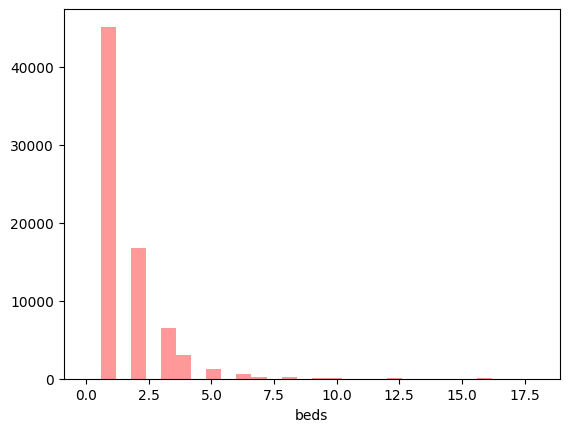

In [68]:
sns.distplot(df['beds'],bins=30,kde=False,color='red')

In [69]:
# As per the mean value we are replacing the number of Nan bed value which is 131 with mean 2
df['beds'].fillna(value=2, inplace=True)

In [70]:
df['bedrooms']

0        1.0
1        3.0
2        1.0
3        2.0
4        0.0
        ... 
74106    1.0
74107    2.0
74108    2.0
74109    0.0
74110    1.0
Name: bedrooms, Length: 74111, dtype: float64

C:\Users\KIIT\AppData\Local\Temp\ipykernel_10324\1860975159.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedrooms'],bins=30,kde=False,color='red')


<Axes: xlabel='bedrooms'>

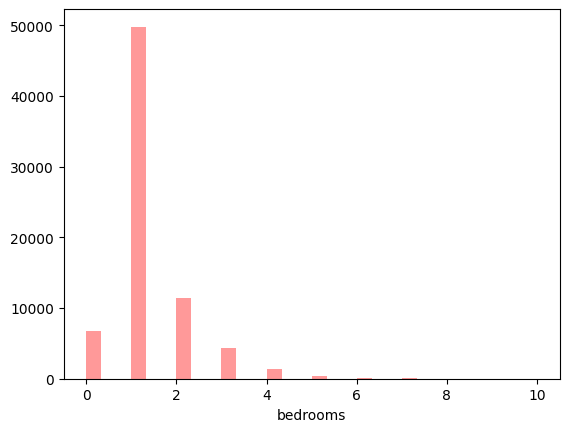

In [71]:
sns.distplot(df['bedrooms'],bins=30,kde=False,color='red')

In [72]:
# As as above for the bedrooms
df['bedrooms'].fillna(value=1, inplace=True)

In [73]:
df['review_scores_rating']

0        100.0
1         93.0
2         92.0
3          NaN
4         40.0
         ...  
74106      NaN
74107     93.0
74108     94.0
74109      NaN
74110     96.0
Name: review_scores_rating, Length: 74111, dtype: float64

C:\Users\KIIT\AppData\Local\Temp\ipykernel_10324\1443679119.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['review_scores_rating'],bins=30,kde=False,color='red')


<Axes: xlabel='review_scores_rating'>

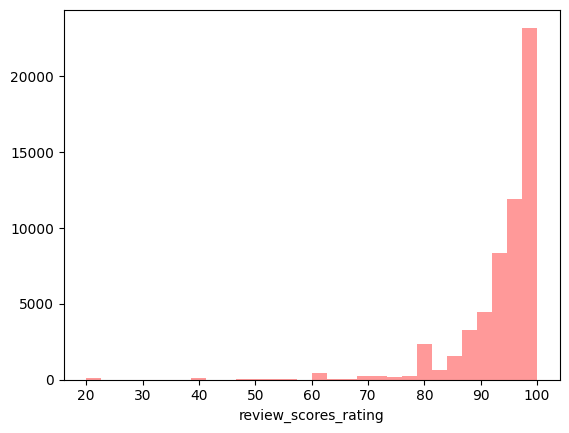

In [74]:
sns.distplot(df['review_scores_rating'],bins=30,kde=False,color='red')

In [75]:
# Same as above 
df['review_scores_rating'].fillna(value=98, inplace=True)

In [76]:
df.isnull().sum()

log_price                     0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                     0
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
number_of_reviews             0
review_scores_rating          0
bedrooms                      0
beds                          0
dtype: int64

In [77]:
df['host_response_rate']

0         NaN
1        100%
2        100%
3         NaN
4        100%
         ... 
74106     NaN
74107    100%
74108    100%
74109    100%
74110    100%
Name: host_response_rate, Length: 74111, dtype: object

In [78]:
df['host_has_profile_pic']

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
74106    1.0
74107    1.0
74108    1.0
74109    1.0
74110    1.0
Name: host_has_profile_pic, Length: 74111, dtype: float64

C:\Users\KIIT\AppData\Local\Temp\ipykernel_10324\913675893.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['host_has_profile_pic'],bins=30,kde=False,color='red')


<Axes: xlabel='host_has_profile_pic'>

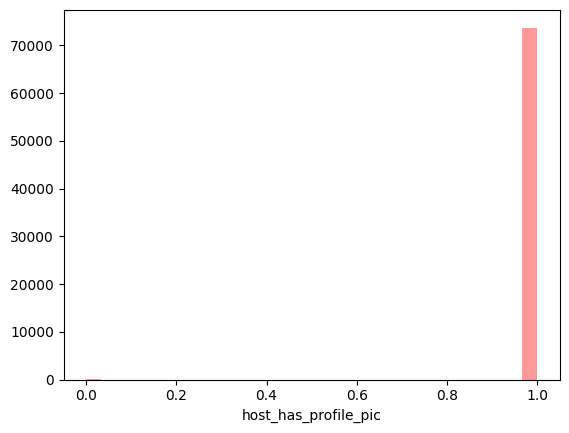

In [79]:
sns.distplot(df['host_has_profile_pic'],bins=30,kde=False,color='red')

In [80]:
# We are doing the same for host_has_profile_pic to fill the Nan values which is low in number
df['host_has_profile_pic'].fillna(value=1, inplace=True)

In [81]:
df['host_identity_verified']

0        1.0
1        0.0
2        1.0
3        1.0
4        1.0
        ... 
74106    1.0
74107    0.0
74108    1.0
74109    0.0
74110    1.0
Name: host_identity_verified, Length: 74111, dtype: float64

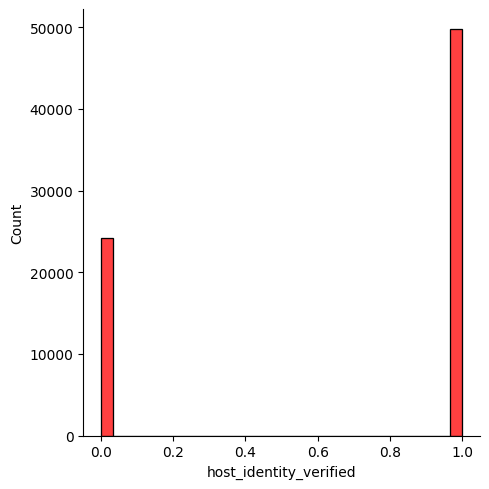

In [82]:
sns.displot(df['host_identity_verified'],bins=30,kde=False,color='red')

In [83]:
df.corr(numeric_only=True)

,log_price,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,host_has_profile_pic,host_identity_verified,instant_bookable,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
log_price,1.000000,0.607125,0.567574,0.355174,0.074772,0.053591,0.111191,-0.013171,0.024170,-0.044271,-0.002193,-0.047529,-0.032470,0.092445,0.473028,0.441619
room_type,0.607125,1.000000,0.458175,0.116256,0.129486,0.034032,0.213340,0.000608,0.069893,-0.027729,-0.022201,-0.030317,0.030333,0.020572,0.243132,0.316631
accommodates,0.567574,0.458175,1.000000,0.505490,0.062598,0.024219,0.182306,-0.003970,0.058198,0.053093,-0.078309,-0.085160,0.041964,-0.027184,0.709214,0.809757
bathrooms,0.355174,0.116256,0.505490,1.000000,0.036810,0.028394,0.054134,-0.003146,0.014791,0.001912,-0.137673,-0.134777,-0.041521,0.015370,0.589783,0.525384
bed_type,0.074772,0.129486,0.062598,0.036810,1.000000,0.005408,0.023768,-0.001946,0.004423,0.022886,0.000549,-0.000016,0.007574,-0.005050,0.051923,0.056789
cancellation_policy,0.053591,0.034032,0.024219,0.028394,0.005408,1.000000,0.007954,0.002213,0.016227,-0.006427,0.009419,0.010584,-0.013585,-0.015592,0.028069,0.013588
cleaning_fee,0.111191,0.213340,0.182306,0.054134,0.023768,0.007954,1.000000,0.022654,0.162567,0.010031,-0.060913,-0.068505,0.110204,-0.031132,0.105491,0.131141
host_has_profile_pic,-0.013171,0.000608,-0.003970,-0.003146,-0.001946,0.002213,0.022654,1.000000,0.075261,-0.009280,0.002262,0.000101,0.020362,-0.006912,0.000573,-0.000240
host_identity_verified,0.024170,0.069893,0.058198,0.014791,0.004423,0.016227,0.162567,0.075261,1.000000,-0.087749,-0.043060,-0.059740,0.162231,-0.005784,0.025924,0.035589
instant_bookable,-0.044271,-0.027729,0.053093,0.001912,0.022886,-0.006427,0.010031,-0.009280,-0.087749,1.000000,-0.006090,-0.002371,0.077276,-0.064757,-0.003586,0.051298


In [84]:
# filling the Nan values which is low in number
df['host_has_profile_pic'].fillna(value=1, inplace=True)

In [85]:
df.isnull().sum()

log_price                     0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                     0
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
first_review              15864
host_has_profile_pic          0
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
number_of_reviews             0
review_scores_rating          0
bedrooms                      0
beds                          0
dtype: int64

In [86]:
df['host_identity_verified'].value_counts()

host_identity_verified
1.0    49748
0.0    24175
Name: count, dtype: int64

In [87]:
# filling the Nan values
df['host_identity_verified'].fillna(value=1, inplace=True)

In [88]:
df.isnull().sum()

log_price                     0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                     0
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
first_review              15864
host_has_profile_pic          0
host_identity_verified        0
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
number_of_reviews             0
review_scores_rating          0
bedrooms                      0
beds                          0
dtype: int64

In [89]:
df['first_review'].value_counts()

first_review
2017-01-01    293
2017-01-22    249
2016-01-02    221
2017-01-02    211
2017-09-04    193
             ... 
2012-12-09      1
2012-04-20      1
2010-11-29      1
2011-03-28      1
2010-12-01      1
Name: count, Length: 2554, dtype: int64

In [90]:
df['last_review'].value_counts()

last_review
2017-04-30    1344
2017-09-24    1278
2017-09-17    1215
2017-04-23    1025
2017-09-18     832
              ... 
2013-12-11       1
2014-06-19       1
2013-10-26       1
2011-03-28       1
2013-12-28       1
Name: count, Length: 1371, dtype: int64

In [91]:
df.head(3)

,log_price,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,first_review,host_has_profile_pic,...,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
0,5.010635,2,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,1.0,0,True,2016-06-18,1.0,...,NaN,2012-03-26,0,2016-07-18,40.696524,-73.991617,2,100.0,1.0,1.0
1,5.129899,2,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,1.0,0,True,2017-08-05,1.0,...,100%,2017-06-19,1,2017-09-23,40.766115,-73.989040,6,93.0,3.0,3.0
2,4.976734,2,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,1.0,0,True,2017-04-30,1.0,...,100%,2016-10-25,1,2017-09-14,40.808110,-73.943756,10,92.0,1.0,3.0


In [92]:
df.isnull().sum()

log_price                     0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                     0
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
first_review              15864
host_has_profile_pic          0
host_identity_verified        0
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
number_of_reviews             0
review_scores_rating          0
bedrooms                      0
beds                          0
dtype: int64

In [93]:
df['host_since']

0        2012-03-26
1        2017-06-19
2        2016-10-25
3        2015-04-19
4        2015-03-01
            ...    
74106    2013-03-24
74107    2016-05-03
74108    2012-01-05
74109    2017-09-17
74110    2012-11-26
Name: host_since, Length: 74111, dtype: object

<Axes: xlabel='host_since_month', ylabel='log_price'>

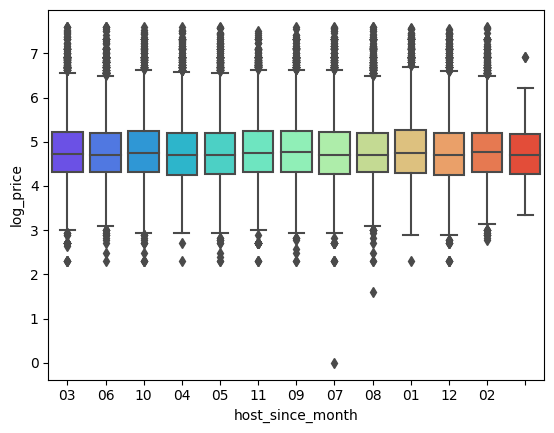

In [169]:
# Seeing the impact of month on log_price
df2=pd.read_csv('train.csv')
df2['host_since_month']=df2['host_since'].apply(lambda host_since: str(host_since)[:][5:7])
df2['host_since_month']
sns.boxplot(x='host_since_month',y='log_price',data=df2,palette='rainbow')

In [94]:
df['host_since']=df['host_since'].apply(lambda host_since: str(host_since)[:][0:4])

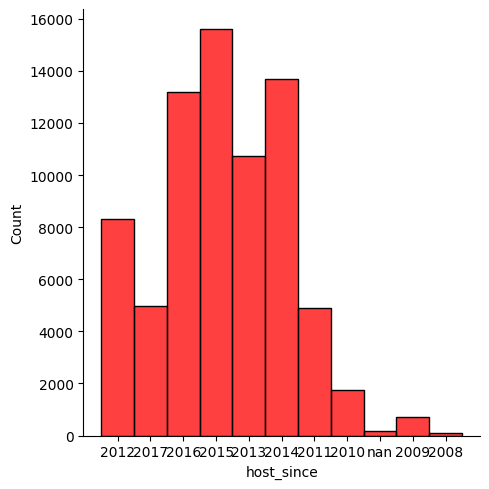

In [95]:
sns.displot(df['host_since'],bins=10,kde=False,color='red')

In [96]:
# filling the Nan values
df['host_since'].fillna(value='2015', inplace=True)

In [97]:
df.isnull().sum()

log_price                     0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                     0
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
first_review              15864
host_has_profile_pic          0
host_identity_verified        0
host_response_rate        18299
host_since                    0
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
number_of_reviews             0
review_scores_rating          0
bedrooms                      0
beds                          0
dtype: int64

In [98]:
df.isnull().sum()

log_price                     0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                     0
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
first_review              15864
host_has_profile_pic          0
host_identity_verified        0
host_response_rate        18299
host_since                    0
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
number_of_reviews             0
review_scores_rating          0
bedrooms                      0
beds                          0
dtype: int64

In [99]:
df['host_since']=df['host_since'].apply(lambda host_since: float(host_since[:]))

In [100]:
df.describe()

,log_price,room_type,accommodates,bathrooms,bed_type,cancellation_policy,host_has_profile_pic,host_identity_verified,host_since,instant_bookable,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,73923.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000
mean,4.782069,1.528221,3.155146,1.234628,0.982054,0.001970,0.996951,0.673800,2014.051107,0.262458,38.445958,-92.397525,20.900568,94.954703,1.265467,1.711379
std,0.717394,0.554599,2.153589,0.581386,0.132756,0.049244,0.055138,0.468825,1.838333,0.439973,3.080167,21.705322,37.828641,7.089224,0.851671,1.253092
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,4.317488,1.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2013.000000,0.000000,34.127908,-118.342374,1.000000,93.000000,1.000000,1.000000
50%,4.709530,2.000000,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2014.000000,0.000000,40.662138,-76.996965,6.000000,98.000000,1.000000,1.000000
75%,5.220356,2.000000,4.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2015.000000,1.000000,40.746096,-73.954660,23.000000,99.000000,1.000000,2.000000
max,7.600402,2.000000,16.000000,8.000000,1.000000,2.000000,1.000000,1.000000,2017.000000,1.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


In [101]:
df['first_review']=df['first_review'].apply(lambda first_review: str(first_review)[:][0:4])

In [102]:
df['last_review']=df['last_review'].apply(lambda last_review: str(last_review)[:][0:4])

In [103]:
df['first_review']=df['first_review'].apply(lambda first_review: float(first_review[:]))
df['last_review']=df['last_review'].apply(lambda last_review: float(last_review[:]))

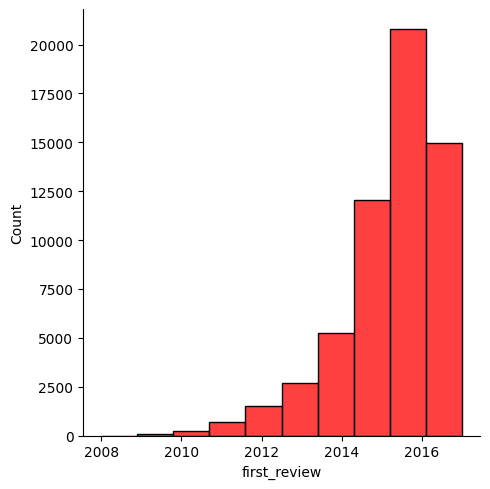

In [104]:
sns.displot(df['first_review'],bins=10,kde=False,color='red')

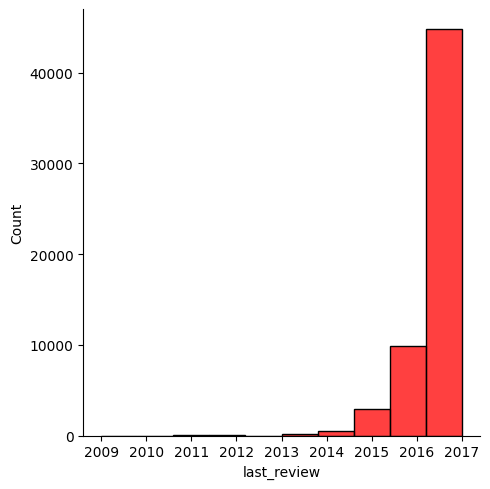

In [105]:
sns.displot(df['last_review'],bins=10,kde=False,color='red')

In [106]:
df['last_review']

0        2016.0
1        2017.0
2        2017.0
3           NaN
4        2017.0
          ...  
74106       NaN
74107    2017.0
74108    2017.0
74109       NaN
74110    2017.0
Name: last_review, Length: 74111, dtype: float64

In [107]:
df.isnull().sum()

log_price                     0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                     0
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
first_review              15864
host_has_profile_pic          0
host_identity_verified        0
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
number_of_reviews             0
review_scores_rating          0
bedrooms                      0
beds                          0
dtype: int64

In [108]:
# Filling the Nan Values
df['last_review'].fillna(value='2017', inplace=True)

In [109]:
# Filling the Nan Values
df['first_review'].fillna(value='2016', inplace=True)

In [110]:
df.isnull().sum()

log_price                     0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                     0
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
first_review                  0
host_has_profile_pic          0
host_identity_verified        0
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review                   0
latitude                      0
longitude                     0
number_of_reviews             0
review_scores_rating          0
bedrooms                      0
beds                          0
dtype: int64

In [111]:
df['host_since'].fillna(value=2015, inplace=True)

In [112]:
df.isnull().sum()

log_price                     0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                     0
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
first_review                  0
host_has_profile_pic          0
host_identity_verified        0
host_response_rate        18299
host_since                    0
instant_bookable              0
last_review                   0
latitude                      0
longitude                     0
number_of_reviews             0
review_scores_rating          0
bedrooms                      0
beds                          0
dtype: int64

In [113]:
df['host_response_rate'].value_counts()

host_response_rate
100%    43254
90%      2277
80%      1113
0%        883
50%       611
        ...  
39%         1
15%         1
31%         1
21%         1
6%          1
Name: count, Length: 80, dtype: int64

In [114]:
df['host_response_rate'].fillna(value='95%', inplace=True)

In [115]:
df.isnull().sum()

log_price                 0
room_type                 0
amenities                 0
accommodates              0
bathrooms                 0
bed_type                  0
cancellation_policy       0
cleaning_fee              0
first_review              0
host_has_profile_pic      0
host_identity_verified    0
host_response_rate        0
host_since                0
instant_bookable          0
last_review               0
latitude                  0
longitude                 0
number_of_reviews         0
review_scores_rating      0
bedrooms                  0
beds                      0
dtype: int64

In [116]:
df['amenities'].value_counts()

amenities
{}                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               586
{"translation missing: en.hosting_amenity_49","translation missing: en.hosting_amenity_50"}                                                                                                                                                                                                                                                                                                                              

In [117]:
df

,log_price,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,first_review,host_has_profile_pic,...,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
0,5.010635,2,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,1.0,0,True,2016.0,1.0,...,95%,2012.0,0,2016.0,40.696524,-73.991617,2,100.0,1.0,1.0
1,5.129899,2,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,1.0,0,True,2017.0,1.0,...,100%,2017.0,1,2017.0,40.766115,-73.989040,6,93.0,3.0,3.0
2,4.976734,2,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,1.0,0,True,2017.0,1.0,...,100%,2016.0,1,2017.0,40.808110,-73.943756,10,92.0,1.0,3.0
3,6.620073,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,1.0,0,True,2016,1.0,...,95%,2015.0,0,2017,37.772004,-122.431619,0,98.0,2.0,2.0
4,4.744932,2,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,1.0,0,True,2015.0,1.0,...,100%,2015.0,1,2017.0,38.925627,-77.034596,4,40.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,4.605170,1,{},1,1.0,1.0,0,False,2016,1.0,...,95%,2013.0,0,2017,40.709025,-73.939405,0,98.0,1.0,1.0
74107,5.043425,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,2.0,1.0,0,True,2016.0,1.0,...,100%,2016.0,0,2017.0,33.871549,-118.396053,16,93.0,2.0,4.0
74108,5.220356,2,"{TV,Internet,""Wireless Internet"",""Air conditio...",5,1.0,1.0,0,True,2015.0,1.0,...,100%,2012.0,1,2017.0,40.706749,-73.942377,43,94.0,2.0,2.0
74109,5.273000,2,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,1.0,0,True,2016,1.0,...,100%,2017.0,1,2017,40.738535,-74.000157,0,98.0,0.0,2.0


In [118]:
df=df.drop('amenities', axis=1)

In [119]:
df.head(3)

,log_price,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
0,5.010635,2,3,1.0,1.0,0,True,2016.0,1.0,1.0,95%,2012.0,0,2016.0,40.696524,-73.991617,2,100.0,1.0,1.0
1,5.129899,2,7,1.0,1.0,0,True,2017.0,1.0,0.0,100%,2017.0,1,2017.0,40.766115,-73.989040,6,93.0,3.0,3.0
2,4.976734,2,5,1.0,1.0,0,True,2017.0,1.0,1.0,100%,2016.0,1,2017.0,40.808110,-73.943756,10,92.0,1.0,3.0


In [120]:
df

,log_price,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
0,5.010635,2,3,1.0,1.0,0,True,2016.0,1.0,1.0,95%,2012.0,0,2016.0,40.696524,-73.991617,2,100.0,1.0,1.0
1,5.129899,2,7,1.0,1.0,0,True,2017.0,1.0,0.0,100%,2017.0,1,2017.0,40.766115,-73.989040,6,93.0,3.0,3.0
2,4.976734,2,5,1.0,1.0,0,True,2017.0,1.0,1.0,100%,2016.0,1,2017.0,40.808110,-73.943756,10,92.0,1.0,3.0
3,6.620073,2,4,1.0,1.0,0,True,2016,1.0,1.0,95%,2015.0,0,2017,37.772004,-122.431619,0,98.0,2.0,2.0
4,4.744932,2,2,1.0,1.0,0,True,2015.0,1.0,1.0,100%,2015.0,1,2017.0,38.925627,-77.034596,4,40.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,4.605170,1,1,1.0,1.0,0,False,2016,1.0,1.0,95%,2013.0,0,2017,40.709025,-73.939405,0,98.0,1.0,1.0
74107,5.043425,2,4,2.0,1.0,0,True,2016.0,1.0,0.0,100%,2016.0,0,2017.0,33.871549,-118.396053,16,93.0,2.0,4.0
74108,5.220356,2,5,1.0,1.0,0,True,2015.0,1.0,1.0,100%,2012.0,1,2017.0,40.706749,-73.942377,43,94.0,2.0,2.0
74109,5.273000,2,2,1.0,1.0,0,True,2016,1.0,0.0,100%,2017.0,1,2017,40.738535,-74.000157,0,98.0,0.0,2.0


In [121]:
df.isnull().sum()

log_price                 0
room_type                 0
accommodates              0
bathrooms                 0
bed_type                  0
cancellation_policy       0
cleaning_fee              0
first_review              0
host_has_profile_pic      0
host_identity_verified    0
host_response_rate        0
host_since                0
instant_bookable          0
last_review               0
latitude                  0
longitude                 0
number_of_reviews         0
review_scores_rating      0
bedrooms                  0
beds                      0
dtype: int64

In [122]:
df2=df['host_response_rate']

In [123]:
df2

0         95%
1        100%
2        100%
3         95%
4        100%
         ... 
74106     95%
74107    100%
74108    100%
74109    100%
74110    100%
Name: host_response_rate, Length: 74111, dtype: object

In [124]:
df['host_response_rate'].value_counts()

host_response_rate
100%    43254
95%     18621
90%      2277
80%      1113
0%        883
        ...  
39%         1
15%         1
31%         1
21%         1
6%          1
Name: count, Length: 80, dtype: int64

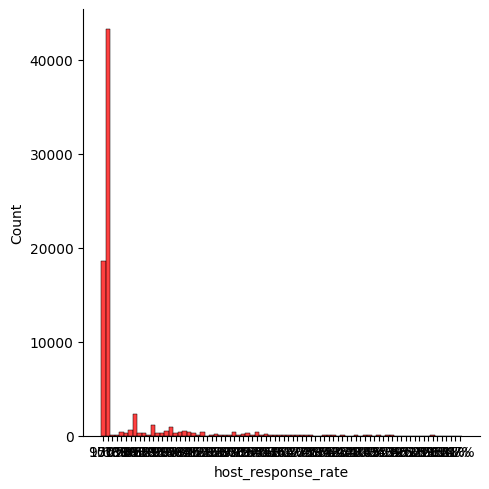

In [125]:
sns.displot(df['host_response_rate'],bins=10,kde=False,color='red')

In [126]:
df['host_response_rate']=df['host_response_rate'].map({'100%':2, '95%': 1})

In [127]:
df['host_response_rate']

0        1.0
1        2.0
2        2.0
3        1.0
4        2.0
        ... 
74106    1.0
74107    2.0
74108    2.0
74109    2.0
74110    2.0
Name: host_response_rate, Length: 74111, dtype: float64

In [128]:
df[(df['host_response_rate'] != 1) & (df['host_response_rate'] != 2)]['host_response_rate']

18      NaN
29      NaN
30      NaN
31      NaN
34      NaN
         ..
74088   NaN
74089   NaN
74091   NaN
74092   NaN
74105   NaN
Name: host_response_rate, Length: 12236, dtype: float64

In [129]:
df.isnull().sum()

log_price                     0
room_type                     0
accommodates                  0
bathrooms                     0
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
first_review                  0
host_has_profile_pic          0
host_identity_verified        0
host_response_rate        12236
host_since                    0
instant_bookable              0
last_review                   0
latitude                      0
longitude                     0
number_of_reviews             0
review_scores_rating          0
bedrooms                      0
beds                          0
dtype: int64

In [130]:
# FIlling the Nan values
df['host_response_rate'].fillna(value=0, inplace=True)

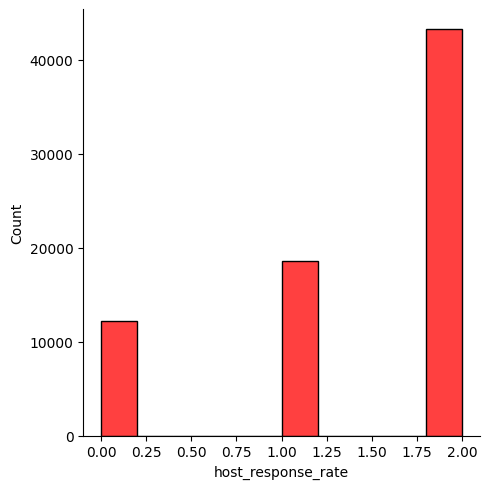

In [131]:
sns.displot(df['host_response_rate'],bins=10,kde=False,color='red')

In [132]:
df.isnull().sum()

log_price                 0
room_type                 0
accommodates              0
bathrooms                 0
bed_type                  0
cancellation_policy       0
cleaning_fee              0
first_review              0
host_has_profile_pic      0
host_identity_verified    0
host_response_rate        0
host_since                0
instant_bookable          0
last_review               0
latitude                  0
longitude                 0
number_of_reviews         0
review_scores_rating      0
bedrooms                  0
beds                      0
dtype: int64

Regression through Deep Learning

In [134]:
from sklearn.model_selection import train_test_split

In [135]:
X=df.drop('log_price', axis=1)

In [136]:
X

,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
0,2,3,1.0,1.0,0,True,2016.0,1.0,1.0,1.0,2012.0,0,2016.0,40.696524,-73.991617,2,100.0,1.0,1.0
1,2,7,1.0,1.0,0,True,2017.0,1.0,0.0,2.0,2017.0,1,2017.0,40.766115,-73.989040,6,93.0,3.0,3.0
2,2,5,1.0,1.0,0,True,2017.0,1.0,1.0,2.0,2016.0,1,2017.0,40.808110,-73.943756,10,92.0,1.0,3.0
3,2,4,1.0,1.0,0,True,2016,1.0,1.0,1.0,2015.0,0,2017,37.772004,-122.431619,0,98.0,2.0,2.0
4,2,2,1.0,1.0,0,True,2015.0,1.0,1.0,2.0,2015.0,1,2017.0,38.925627,-77.034596,4,40.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,1,1,1.0,1.0,0,False,2016,1.0,1.0,1.0,2013.0,0,2017,40.709025,-73.939405,0,98.0,1.0,1.0
74107,2,4,2.0,1.0,0,True,2016.0,1.0,0.0,2.0,2016.0,0,2017.0,33.871549,-118.396053,16,93.0,2.0,4.0
74108,2,5,1.0,1.0,0,True,2015.0,1.0,1.0,2.0,2012.0,1,2017.0,40.706749,-73.942377,43,94.0,2.0,2.0
74109,2,2,1.0,1.0,0,True,2016,1.0,0.0,2.0,2017.0,1,2017,40.738535,-74.000157,0,98.0,0.0,2.0


In [137]:
y=df['log_price']

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [139]:
from sklearn.preprocessing import MinMaxScaler

In [140]:
scaler=MinMaxScaler()

In [141]:
X_train=scaler.fit_transform(X_train)

In [142]:
X_test=scaler.transform(X_test)

In [143]:
from tensorflow.keras.models import Sequential 

In [144]:
from tensorflow.keras.layers import Dense

In [145]:
model=Sequential()

In [146]:
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))

model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [147]:
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), batch_size=128, epochs=400)

Epoch 1/400
406/406 [==============================] - 2s 2ms/step - loss: 2.3234 - val_loss: 0.2526
Epoch 2/400
406/406 [==============================] - 1s 2ms/step - loss: 0.2499 - val_loss: 0.2443
Epoch 3/400
406/406 [==============================] - 1s 2ms/step - loss: 0.2453 - val_loss: 0.2479
Epoch 4/400
406/406 [==============================] - 1s 2ms/step - loss: 0.2426 - val_loss: 0.2449
Epoch 5/400
406/406 [==============================] - 1s 2ms/step - loss: 0.2390 - val_loss: 0.2340
Epoch 6/400
406/406 [==============================] - 1s 2ms/step - loss: 0.2354 - val_loss: 0.2355
Epoch 7/400
406/406 [==============================] - 1s 2ms/step - loss: 0.2330 - val_loss: 0.2310
Epoch 8/400
406/406 [==============================] - 1s 2ms/step - loss: 0.2313 - val_loss: 0.2570
Epoch 9/400
406/406 [==============================] - 1s 2ms/step - loss: 0.2299 - val_loss: 0.2247
Epoch 10/400
406/406 [==============================] - 1s 2ms/step - loss: 0.2282 - val_lo

<Axes: >

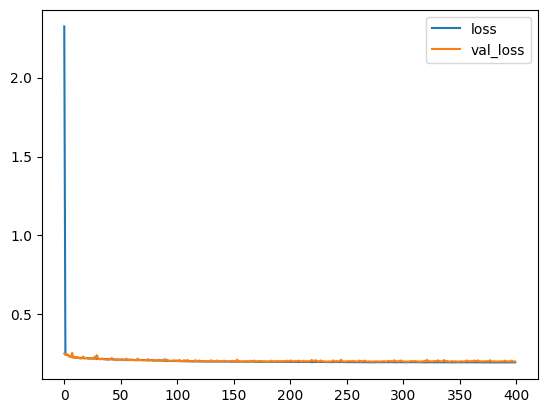

In [148]:
losses=pd.DataFrame(model.history.history)
losses.plot()

In [149]:
losses

,loss,val_loss
0,2.323424,0.252646
1,0.249888,0.244290
2,0.245341,0.247937
3,0.242602,0.244941
4,0.239019,0.233989
...,...,...
395,0.196050,0.201262
396,0.196451,0.208077
397,0.196353,0.201826
398,0.196136,0.202062


In [150]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [151]:
predictions=model.predict(X_test)

695/695 [==============================] - 1s 1ms/step


In [152]:
mean_squared_error(y_test,predictions)

0.20239992409455954

In [153]:
# root mean squared error
mean_squared_error(y_test,predictions)**0.5

0.44988879080786126

In [154]:
mean_absolute_error(y_test, predictions)

0.3396189327627014

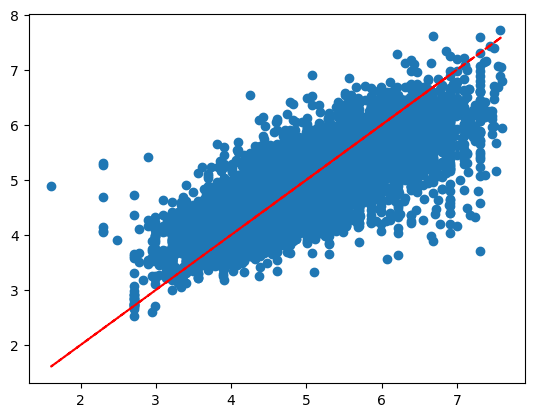

In [155]:
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, 'r--')

Normal Linear Regression

In [156]:
from sklearn.linear_model import LinearRegression

In [157]:
lm = LinearRegression()

In [158]:
lm.fit(X_train,y_train)

LinearRegression()

In [159]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

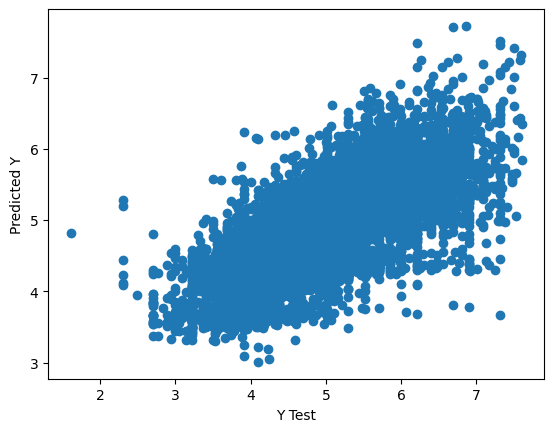

In [160]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [161]:
mean_squared_error(y_test,predictions)

0.23915157036338328

In [162]:
# root mean squared error
mean_squared_error(y_test,predictions)**0.5

0.489031257041289

In [163]:
mean_absolute_error(y_test, predictions)

0.36998088856897016

Responses to common queries regarding the model:


1. What are the most important features that determine the price of an Airbnb listing? Which features have the 
   strongest correlation with price?
Answer: As per the table the feature that is the most correlated with the log_price is accomodities feature.
   
2. How accurate can your model predict the price of an Airbnb listing? What is the mean absolute error (MAE) or root 
   mean squared error (RMSE) of your model?
Answer: With Deep Learning Algorithm: 
        MSE (Mean Square Error)=0.20
        RMSE (Root Mean Square Error)=0.44
        MAE (Mean Absolute Error)=0.33

        With Normal Linear Regression:
        MSE (Mean Square Error)=0.23
        RMSE (Root Mean Square Error)=0.48
        MAE (Mean Absolute Error)=0.37

3. Can you identify any seasonal patterns or trends in Airbnb prices? Are prices higher during certain times of the
   year, or on weekends versus weekdays?
Answer: We have examined the host_since column with log_price. It is seen the log_price is nearly same for all the 
        months

4. How do the prices of Airbnb listings vary across different neighborhoods or regions? Are some neighborhoods more
   expensive than others?
Answer: We have examined the neighbourhood column with log_price. It is seen the log_price is nearly same for all   
        the months.

5. Are there any outliers or anomalies in the data that might be affecting the accuracy of your model? How can you
   deal with these outliers?
Answer: As per the regression model their are some outliers, this are mainly becuase we did drop out some which do  
        not vasly impact the log price. And there is a column for amenities which consists of the features in amenities, as we are not dealing with NLP that is why we are dropping this column.

6.  How does the size or type of the Airbnb listing affect its price? For example, do larger apartments command
    higher prices than smaller ones?
Answer: As per the property_type column, log_price is roughly not dependent on the property_type. But if we do the   
        comparison in regards to the room_type then a trend with romm_type and log_price can be excavated, which is already visualized and included in the developed model. 

7.  Can you compare the performance of different machine learning algorithms for this task, such as linear   
    regression, decision trees, or neural networks? Which algorithm performs the best in terms of accuracy and speed?
Answer: We have implemented two models here:
        1. Normal Linear Regression
        2. Deep Learning (Regression)
        As per the results obtained Deep Learning Alogrithm seems to work better in terms of MSE, RMSE, MAE compared to Nornal Linear Regression, and number of outliers is also less.
        But in terms of speed it is slower compared to Normal Linear Regression.

8.  By answering these questions, you can gain insights into the factors that affect Airbnb prices and develop a    
    more accurate model for predicting prices.
Answer: As per the pairplot and correlation table with futher seaborn visualizations, accomodates, bathrooms,  
        cancellation_policy, room_type seems to affect the log_price. But if we can preprocess amenities into some accpetable form for our model them and introduct the affect of property_type in our model them we can hope that out developed model would perform much better in predicting the outcome.